<a href="https://colab.research.google.com/github/mohammedhemed77/DL-Course-UDL-Book-Based-/blob/main/Implementations/Notebooks/Deep_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Vectorization

In [ ]:
# create u vector of shape 1 * 1000,000
u = np.random.rand(1000000)
# create v vector of shape 1 * 1000,000
v = np.random.rand(1000000)
c = 0

#### Calculate time of vectorized version of dot product

In [ ]:
start_time = time.time()
c = np.dot(u,v)
end_time = time.time()
print(c)
numpy_time = end_time - start_time
print("Numpy dot product time = " ,(end_time - start_time) * 1000 , 'msec')

249746.70993047286
Numpy dot product time =  1.813650131225586 msec


#### Calculate time of dot product using for loop for loop

In [ ]:
c = 0
start_time = time.time()
for i in range(1000000):
    c += u[i] * v[i]
end_time = time.time()
print(c)
for_loop_time = end_time - start_time
print("For-loop dot product time = " ,(end_time - start_time)*1000,'ms')

249746.7099304818
For-loop dot product time =  465.73901176452637 ms


#### compare results

In [ ]:
print (for_loop_time/numpy_time)

256.79650322071774


## Broadcasting :

In [ ]:
# Array A: shape (400, 1)
A = np.random.randn(400, 1)
# Array B: shape (1, 1)
B = np.random.randn(1, 1)

# Broadcasting: B is "stretched" to shape (400, 1) and added to A
C = A + B
print("A shape:", A.shape)  # (400, 1)
print("B shape:", B.shape)  # (1, 1)
print("C shape:", C.shape)  # (400, 1)

A shape: (400, 1)
B shape: (1, 1)
C shape: (400, 1)


# Design this simple deep NN


 -> input  (1)

 -> h-layer(1) : 3 neurons

 -> h-layer(2) : 4 neurons

 -> output (1)

 #### You can draw your own network using this site : https://alexlenail.me/NN-SVG/

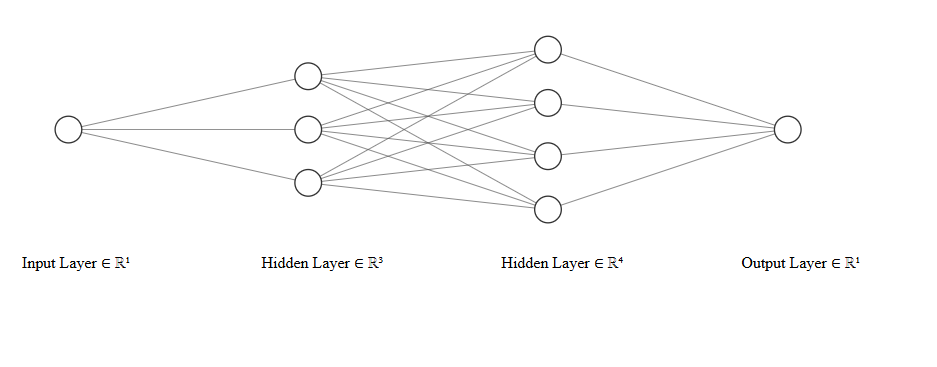

In [ ]:
# if you want the same results each time you run the cell uncomment this line
# np.random.seed(42)      # Set random seed for reproducibility
def relu(x):
    return np.maximum(0, x)
# Network architecture:
W1 = np.random.randn(3,1)
b1 = np.random.randn(3,1)

W2 = np.random.randn(4,3)
b2 = np.random.randn(4,1)

W3 = np.random.randn(1,4)
b3 = np.random.randn(1,1)

# ---------------------------
# total numer of parameters = 27
# W1 = 3 , b1 = 3 | w2 = 12 , b2 = 4 | w3 = 4 , b3 = 1
# biases = 8 , Wieghts = 19
# -------------------------------------------------------

def network(x):                          # input : x                                             (3,1)
    h1 = relu(np.dot(W1 ,x) + b1)        # Relu (w1 * x.T + b1)                                  (4,3) * (3,1) + (4,1)  = (4,1)
    h2 = relu(np.dot(W2 ,h1) + b2)       # Relu (W2 * x + b2) = Relu ( W2 (W1 * x + b1) + b2 )   (4,4) * (4,1) + (4,1)  = (4,1)
    y = (np.dot(W3,h2) + b3)             # W3 * x + b3 = W3 (W2 * x + b2) + b3                   (1,4) * (4,1) + (1,1)  = (1,1)
    return y                             # output : y

In [ ]:
# Generate dataset (1D input)
N = 100
x_train = np.linspace(-5, 5, N).reshape(1, N)  # Shape (1, N)
y_train = np.sin(x_train) + 0.1 * np.random.randn(1, N)  # True values with noise

# Get neural network predictions
y_pred = np.array([network(x.reshape(1,1)) for x in x_train.T]).flatten()


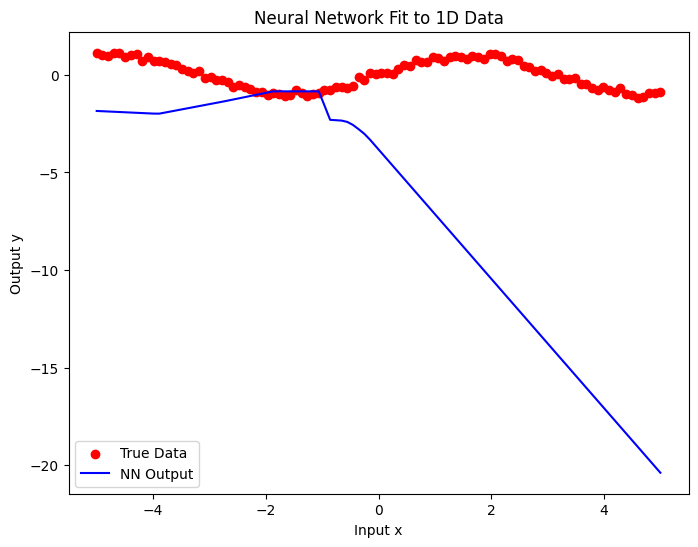

In [ ]:
# Plot results
plt.figure(figsize=(8,6))
plt.scatter(x_train.flatten(), y_train.flatten(), color='red', label="True Data")
plt.plot(x_train.flatten(), y_pred, label="NN Output", color='blue')
plt.xlabel("Input x")
plt.ylabel("Output y")
plt.title("Neural Network Fit to 1D Data")
plt.legend()
plt.show()

In [ ]:
# check dimensions
print ("W1 = ", W1,W1.shape,'\n')
print ("b1 = ", b1,b1.shape,'\n')
print ("W2 = ", W2,W2.shape,'\n')
print ("b2 = ", b2,b2.shape,'\n')
print ("W3 = ", W3,W3.shape,'\n')
print ("b3 = ", b3,b3.shape,'\n')

W1 =  [[ 1.72470155]
 [ 1.62158662]
 [-0.24387305]] (3, 1) 

b1 =  [[ 0.74782259]
 [ 1.69816785]
 [-0.45617781]] (3, 1) 

W2 =  [[ 1.24070488 -1.47435667 -0.87873813]
 [ 1.23111611  0.91155847 -0.32163302]
 [-0.74780344  0.4595257   0.12234619]
 [-0.33393288  0.80046501  0.15147094]] (4, 3) 

b2 =  [[ 0.4361327 ]
 [ 1.46153841]
 [-0.3396384 ]
 [-0.03193244]] (4, 1) 

W3 =  [[ 3.17816811 -1.15426628 -1.79333763  1.16750857]] (1, 4) 

b3 =  [[-0.5446837]] (1, 1) 



## MNIST dataset
#### Hello World ! of Deep Nueral Nets  
Total Images: 70,000

Training Set: 60,000 images

Test Set: 10,000 images

Image Dimensions: 28 x 28 pixels

Total Pixels per Image: 784

Color Scale: Grayscale

Pixel Value Range: 0 to 255 (usually normalized to 0–1)

Number of Classes: 10 (digits 0 through 9)

#### Import needed libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K

##### import dataset

In [ ]:
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#### Some statistics about the dataset

In [ ]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


#### Data visualization : sample the 25 random MNIST digits and visualize them

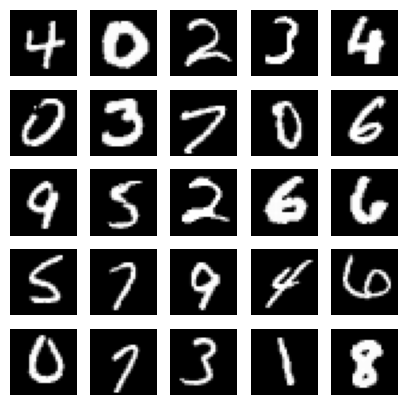

In [ ]:
# sample 25 mnist digits from train dataset

indexes = np.random.randint(0, x_train.shape[0], size = 25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

### Designing model architecture using Keras

The MLP model,  can be used for MNIST digits classification.

When the units or perceptrons are exposed, the MLP model is a fully connected network.

The following code shows how to design the MLP model architecture using Keras.

The first step in designing the model architecture is to import the Keras layers. This can be done as follows:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

### Compute the number of labels
Now, the data must be in the correct shape and format.

After loading the MNIST dataset, the number of labels is computed as:

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))

### One-Hot Encoding
At this point, the labels are in digits format, 0 to 9.

This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.

A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.

For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.

The following lines convert each label into a one-hot vector:

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Data Preprocessing
In deep learning, data is stored in tensors. The term tensor applies to a scalar (0D tensor), vector (1D tensor), matrix (2D tensor), and a multi-dimensional tensor.

The rest code computes the image dimensions, input_size of the first Dense layer and scales each pixel value from 0 to 255 to range from 0.0 to 1.0. Although raw pixel values can be used directly, it is better to normalize the input data as to avoid large gradient values that could make training difficult.

The output of the network is also normalized. After training, there is an option to put everything back to the integer pixel values by multiplying the output tensor by 255.

The proposed model is based on MLP layers. Therefore, the input is expected to be a 1D tensor. So, x_train and x_test are reshaped to [60000, 28 28] and [10000, 28 28], respectively.



In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

### Setting network parameters

Now, we will set the network parameters as follows:

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256

### Designing the model architecture

In [ ]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

### View model summary :

Keras library provides us summary() method to check the model description.

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

### Implement MLP model using Keras :
Back to Table of Contents

The implementation of MLP model in Keras comprises of three steps:-

Compiling the model with the compile() method.

Training the model with fit() method.

Evaluating the model performance with evaluate() method.

For detailed discussion on implementation, please refer to my previous kernel Comprehensive Guide to ANN with Keras


### Compile the model with compile() method

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

 ### Train the model with fit() method

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8618 - loss: 0.4831
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9684 - loss: 0.1025
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9807 - loss: 0.0619
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9866 - loss: 0.0435
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9899 - loss: 0.0321
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9928 - loss: 0.0235
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9932 - loss: 0.0222
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9953 - loss: 0.0151
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9957 - loss: 0.0129
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9958 - loss: 0.0121
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9967 - loss: 0.0101
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

### Binary-Entropy Loss (2 classes)
$$
L = - \sum_{i=1}^{n} \left[ y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) \right]
$$

### Cross-Entropy Loss (Multiclass)
$$
L = -  \sum_{i=1}^{n} \sum_{j=1}^{C} y_{i,j} \log \hat{y}_{i,j}
$$

In [ ]:
import numpy as np

def binary_cross_entropy(y_true, y_pred):
    # Compute Binary Cross-Entropy Loss.
    epsilon = 1e-9  # Small value to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values between (1e-9, 1-1e-9)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


def categorical_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred), axis=1).mean()
    return loss


def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


# -------------------------
# Binary Classification Example
# -------------------------
y_true_binary = np.array([1, 0, 1, 1, 0])  # True labels
y_pred_binary = np.array([0.9, 0.1, 0.8, 0.7, 0.2])  # Model predictions

bce_loss = binary_cross_entropy(y_true_binary, y_pred_binary)
print(f"Binary Cross-Entropy Loss: {bce_loss:.4f}")

# -------------------------
# Categorical Classification Example (3 classes)
# -------------------------
y_true_categorical = np.array([
    [1, 0, 0],  # Class 0
    [0, 1, 0],  # Class 1
    [0, 0, 1],  # Class 2
])

y_pred_categorical = np.array([
    [0.7, 0.2, 0.1],  # Model predicts Class 0
    [0.1, 0.8, 0.1],  # Model predicts Class 1
    [0.2, 0.2, 0.6],  # Model predicts Class 2
])

ce_loss = categorical_cross_entropy(y_true_categorical, y_pred_categorical)
print(f"Categorical Cross-Entropy Loss: {ce_loss:.4f}")


Binary Cross-Entropy Loss: 0.2027
Categorical Cross-Entropy Loss: 0.3635


### MSE Loss vs BCE Loss

In [ ]:
y_true = np.array([1, 0, 1, 1, 0])  # True labels
y_pred_good = np.array([0.9, 0.1, 0.8, 0.7, 0.2])  # Good predictions
y_pred_bad = np.array([0.6, 0.4, 0.6, 0.6, 0.4])  # Less confident predictions

# Compute losses
mse_good = mse(y_true, y_pred_good)
bce_good = binary_cross_entropy(y_true, y_pred_good)

mse_bad = mse(y_true, y_pred_bad)
bce_bad = binary_cross_entropy(y_true, y_pred_bad)

# Print results
print(f"Good Predictions - MSE: {mse_good:.4f}, BCE: {bce_good:.4f}")
print(f"Bad Predictions  - MSE: {mse_bad:.4f}, BCE: {bce_bad:.4f}")


Good Predictions - MSE: 0.0380, BCE: 0.2027
Bad Predictions  - MSE: 0.1600, BCE: 0.5108


#### Does epsilon Affect Loss Calculation?

Yes, but only when y_pred is exactly 0 or 1.
Instead of computing log(0), we compute:

log
⁡
(
1
𝑒
−
9
)
=
−
20.72
log(1e−9)=−20.72

This slightly increases the loss, but it’s better than getting NaN errors and breaking the training.

In [ ]:
print (np.log(1e-9))
print (np.log(0))
print (np.log(1))

-20.72326583694641
-inf
0.0


<ipython-input-42-d5ed26f5865d>:2: RuntimeWarning: divide by zero encountered in log
  print (np.log(0))


#### Numpy clip function

In [ ]:

value = 40
epsilon = 50  # epsilon + 10 = 60
a = np.clip (value ,epsilon,epsilon+10)
print (a)



50


In [ ]:
np.log(1)

0.0